# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES** 

### Basic Summary of the Data

In [2]:
import pandas
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train + 1)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Exploratory visualization of the dataset

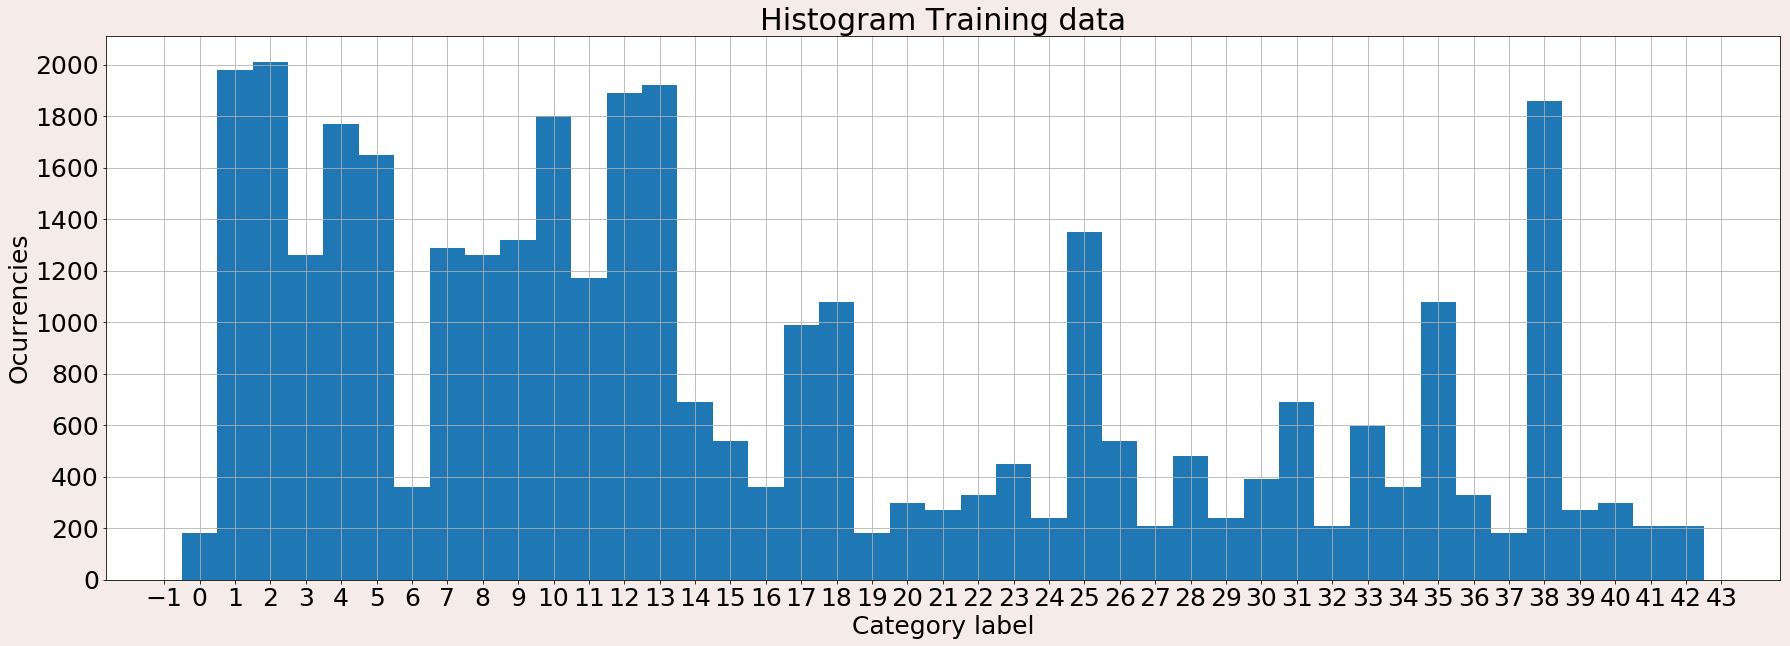

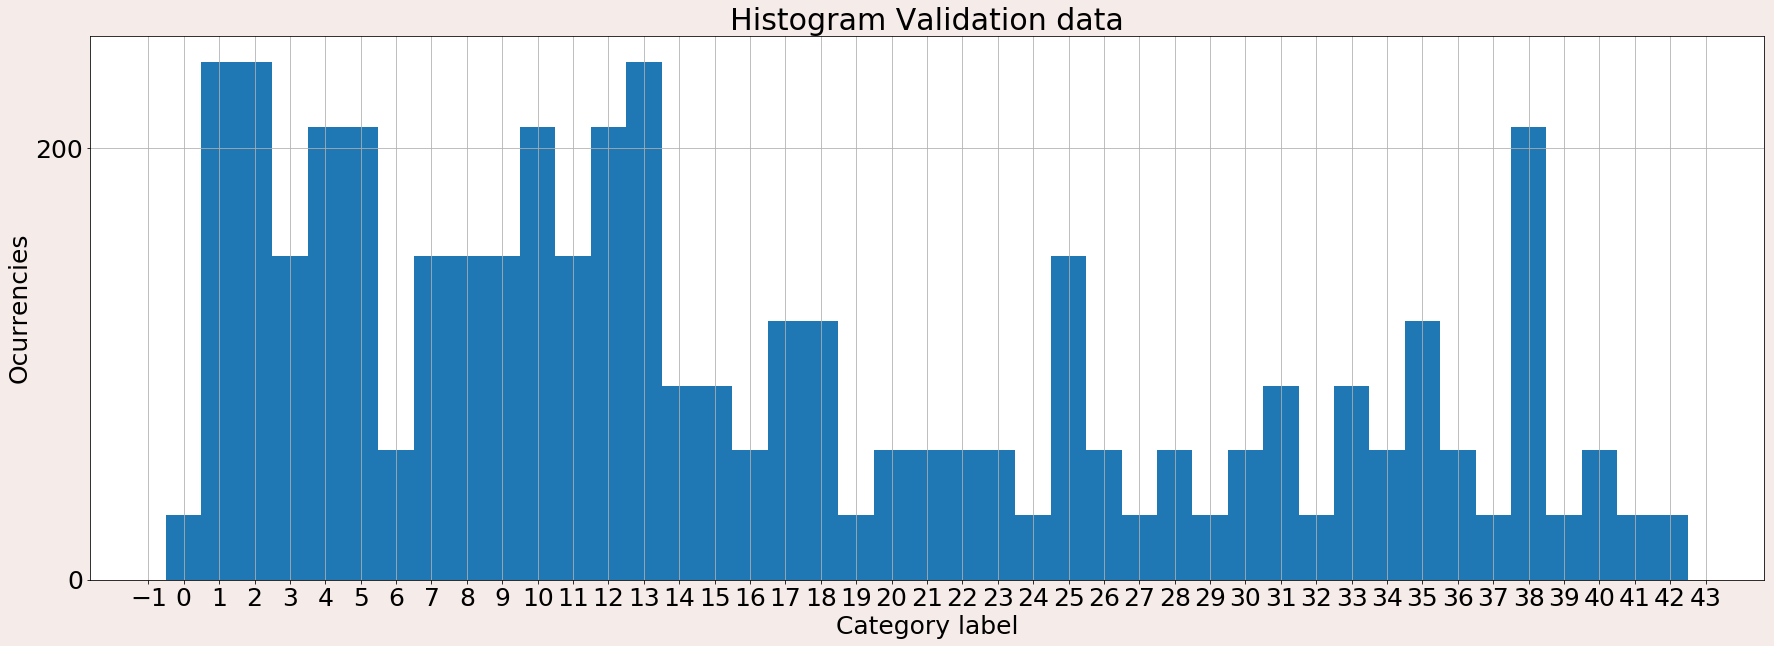

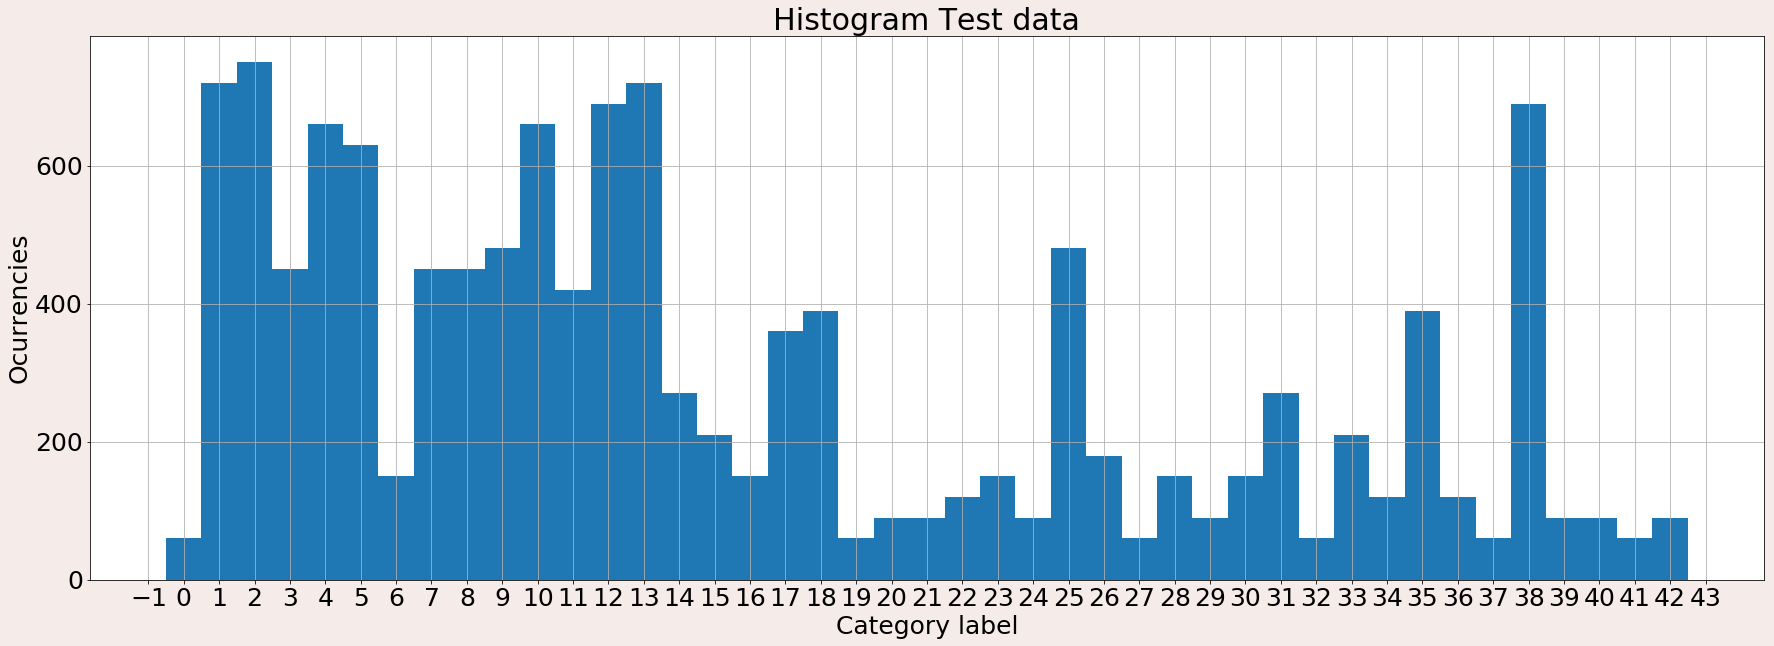

In [34]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Visualizations will be shown in the notebook.

#Function to count the number of ocurrences of each element. It
# returns a dictionary with the count of unique elements
counted_train = Counter(y_train)
#print(counted_train)
#==============================================histogram of the data===================================
d = np.diff(np.unique(y_train)).min()
left_of_first_bin = y_train.min() - float(d)/2
right_of_last_bin = y_train.max() + float(d)/2
fig, ax = plt.subplots(1,1,facecolor=(.96, .92, .91),figsize=(30,10))
ax.set_title('Histogram Training data', color='k', size = 30)
ax.set_xlabel('Category label', color='k', size = 25)
ax.set_ylabel('Ocurrencies', color='k', size = 25)
ax.tick_params(labelcolor='k', labelsize = 25)
ax.grid(True)
ax.xaxis.set_ticks(np.arange(-1.0,44.0,1.0))
ax.yaxis.set_ticks(np.arange(0.0,2100.0,200.0))
ax.hist(y_train, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

d = np.diff(np.unique(y_valid)).min()
left_of_first_bin = y_valid.min() - float(d)/2
right_of_last_bin = y_valid.max() + float(d)/2
fig, ax = plt.subplots(1,1,facecolor=(.96, .92, .91),figsize=(30,10))
ax.set_title('Histogram Validation data', color='k', size = 30)
ax.set_xlabel('Category label', color='k', size = 25)
ax.set_ylabel('Ocurrencies', color='k', size = 25)
ax.tick_params(labelcolor='k', labelsize = 25)
ax.grid(True)
ax.xaxis.set_ticks(np.arange(-1.0,44.0,1.0))
ax.yaxis.set_ticks(np.arange(0.0,2100.0,200.0))
ax.hist(y_valid, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

d = np.diff(np.unique(y_test)).min()
left_of_first_bin = y_test.min() - float(d)/2
right_of_last_bin = y_test.max() + float(d)/2
fig, ax = plt.subplots(1,1,facecolor=(.96, .92, .91),figsize=(30,10))
ax.set_title('Histogram Test data', color='k', size = 30)
ax.set_xlabel('Category label', color='k', size = 25)
ax.set_ylabel('Ocurrencies', color='k', size = 25)
ax.tick_params(labelcolor='k', labelsize = 25)
ax.grid(True)
ax.xaxis.set_ticks(np.arange(-1.0,44.0,1.0))
ax.yaxis.set_ticks(np.arange(0.0,2100.0,200.0))
ax.hist(y_test, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

#==============================================Show images from classes======================================
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()


classes, indices = np.unique(y_valid, axis=0, return_index=True)
show_images(X_valid[indices], cols=6)
plt.show()
%matplotlib inline

(43, 32, 32, 3)


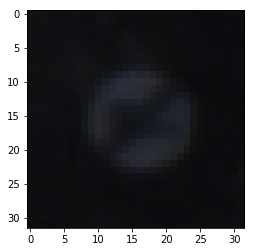

In [4]:
test = X_valid[indices]
print(test.shape)
for i in range(0,test.shape[0]):
    plt.imshow(test[i])
    plt.show

----

# Step 2: Design and Test a Model Architecture
Target validation accuracy is at least 0.93

# Pre-process the Data Set (normalization, grayscale, etc.)

### Data augmentation
Test using opencv

In [5]:
#========Data augmentation =======
import cv2
import math
from random import randint
from random import uniform
dist_translation = 5
HEIGHT = image_shape[0] 
WIDTH = image_shape[1] 
#Image Translation
def translate_and_scale(img):
    distance_vertical = randint(-7, 7)
    distance_horizontal = randint(-7, 7)
    resize_factor = random.uniform(0.7, 1.2)
    sampl = np.random.uniform(low=0.5, high=13.3, size=(3,))
    translation_matrix = np.float32([ [1,0,distance_vertical], [0,1,distance_horizontal] ])
    result = cv2.warpAffine(img, translation_matrix, (int(image_shape[0]/resize_factor), int(image_shape[1]/resize_factor)))
    return result

#Image Rotate
def rotate(img):
    angle = randint(-20, 20)
    image_center = (image_shape[0]/2, image_shape[1]/2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(img, rot_mat, (image_shape[0], image_shape[1]), flags=cv2.INTER_LINEAR)
    return result

def augment(img):
    return rotate(translate_and_scale(img))
                


### Transform Data to YUV color space (unused)

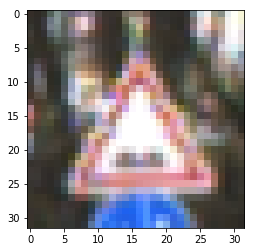

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Transform images to YUV color space
import cv2
plt.imshow(X_valid[indices[22]])
plt.show()
X_train_yuv = np.copy(X_train)
X_valid_yuv = np.copy(X_valid)
X_test_yuv = np.copy(X_test)

i = 0
for image in X_train:
    X_train_yuv[i] = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    i = i +1

i = 0
for image in X_valid:
    X_valid_yuv[i] = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    i = i +1

i = 0
for image in X_test:
    X_test_yuv[i] = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    i = i +1


### Test Scaling images

original image 1


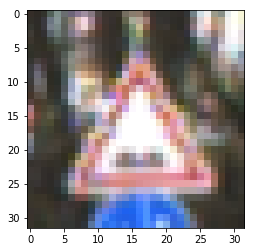

scaled image 1


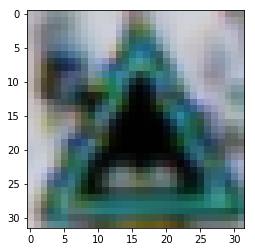

In [7]:
import tensorflow as tf
from random import randint
from random import uniform
from math import ceil, floor
IMAGE_SIZE = image_shape[0] 

def central_scale_images_test(X_imgs, scales):
    # Various settings needed for Tensorflow operation
    # Various settings needed for Tensorflow operation
    tf.reset_default_graph()
    boxes = tf.placeholder(np.float32, shape = (1,4))
    box_ind = np.zeros(1, dtype = np.int32)
    crop_size = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    
    X_scale_data = []
    X = tf.placeholder(tf.float32, shape = (1, IMAGE_SIZE, IMAGE_SIZE, 3))
    # Define Tensorflow operation for all scales but only one base image at a time
    tf_img = tf.image.crop_and_resize(X, boxes, box_ind, crop_size)
    i = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for img in X_imgs:
            x1 = y1 = 0.5 - 0.5 * scales[i] # To scale centrally
            x2 = y2 = 0.5 + 0.5 * scales[i]
            scaled_img = sess.run(tf_img, feed_dict = {X: np.array([img]), boxes: np.array([[y1, x1, y2, x2]])})
            i = i+1
            X_scale_data.extend(scaled_img)
    
    #X_scale_data = np.array(X_scale_data, dtype = np.float32)
    return np.array(X_scale_data, dtype = np.int32)
	
# Produce each image at scaling of 90%, 75% and 60% of original image.
test_images = X_valid[indices[22:25]]
translated_imgs = central_scale_images_test(test_images,np.array([0.7,0.9,1.1]))
#print(translated_imgs)

print("original image 1")
plt.imshow(test_images[0])
plt.show()

print("scaled image 1")
plt.imshow(np.array(translated_imgs[0], np.int32))
plt.show()

#print("translated image 2")
#plt.imshow(translated_imgs[1])
#plt.show()

#print("translated image 3")
#plt.imshow(translated_imgs[2])
#plt.show()

### Test Moving image (vertically and horizontally)

(3, 32, 32, 3)
original image 1


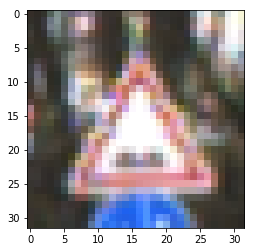

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


translated image 1


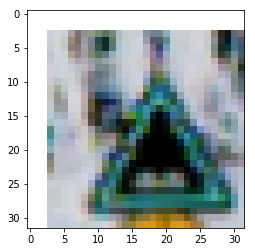

In [8]:
def tf_image_translate(images, distances, interpolation='NEAREST'):
    # got these parameters from solving the equations for pixel translations
    # on https://www.tensorflow.org/api_docs/python/tf/contrib/image/transform
    X = tf.placeholder(tf.float32, shape = (1, IMAGE_SIZE, IMAGE_SIZE, 3))
    transform = tf.placeholder(tf.float32, shape = (8))
    translation = tf.contrib.image.transform(X, transform, interpolation)
    result = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        i=0
        for img in images:  
            translated_image = sess.run(translation, feed_dict = {X: np.array([img]), transform:np.array([1,0,distances[i][0],0,1,distances[i][1],0,0])})
            i = i+1
            result.extend(translated_image)
    result = np.array(result, dtype = np.int32)
    return (result)

test_images = X_valid[indices[22:25]]
translated_imgs = tf_image_translate(np.array(test_images),np.array([[-3, -3],[-5,5],[-2,2]]))
print(translated_imgs.shape)
print("original image 1")
plt.imshow(test_images[0])
plt.show()
print("translated image 1")
plt.imshow(translated_imgs[0])
plt.show()

#plt.imshow(translated_imgs[1])
#plt.show()

#plt.imshow(translated_imgs[2])
#plt.show()

### Test Rotate images

(3, 32, 32, 3)
original image


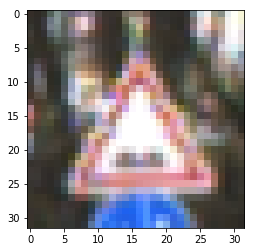

rotated image 1


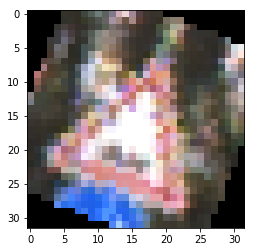

In [9]:
def rotate_images(X_imgs, radians_arr):
    X_rotate = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))
    radian = tf.placeholder(tf.float32, shape = 1)
    tf_img = tf.contrib.image.rotate(X, radian)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        i = 0
        for img in X_imgs:
            rotated_img = sess.run(tf_img, feed_dict = {X: np.array([img]), radian: np.array([radians_arr[i]])})
            i = i + 1
            X_rotate.extend(rotated_img)

    X_rotate = np.array(X_rotate, dtype = np.int32)
    return X_rotate
	
# Start rotation at -90 degrees, end at 90 degrees and produce totally 14 images
test_images = X_valid[indices[22:25]]
rotated_imgs = rotate_images(np.array(test_images), [-1.57/4, -1.57/4, 3.14/8])
print(rotated_imgs.shape)
print("original image")
plt.imshow(test_images[0])
plt.show()
print("rotated image 1")
plt.imshow(rotated_imgs[0])
plt.show()

#plt.imshow(rotated_imgs[1])
#plt.show()

#plt.imshow(rotated_imgs[2])
#plt.show()

###  Test Changing brightness and saturation

(3, 32, 32, 3)
original image


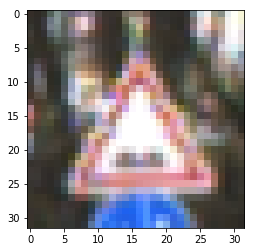

transformed image


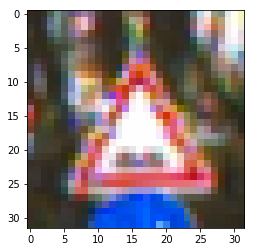

In [10]:
def lighting(images):
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (IMAGE_SIZE, IMAGE_SIZE, 3))
    brightness = tf.image.random_brightness(X, max_delta=0.5)
    saturation = tf.image.random_saturation(brightness, lower=0.5, upper=2.5)
    new_images = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for img in images:
            new_img = sess.run(saturation, feed_dict = {X:img})
            new_images.extend([new_img])
        new_images = np.array(new_images, dtype = np.int32)
    return (new_images)

# Start rotation at -90 degrees, end at 90 degrees and produce totally 14 images
test_images = X_valid[indices[22:25]]
rotated_imgs = lighting(np.array(test_images))
print(rotated_imgs.shape)
print("original image")
plt.imshow(test_images[0])
plt.show()
print("transformed image")
plt.imshow(np.array(rotated_imgs[0], dtype = np.int32))
plt.show()
    
        

### Test performing all operations(translate, rotate, change brightness and saturation)

(3, 32, 32, 3)
0
original image


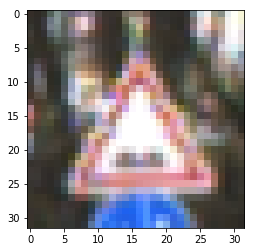

transformed image


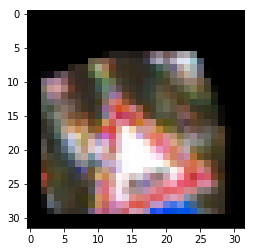

1
original image


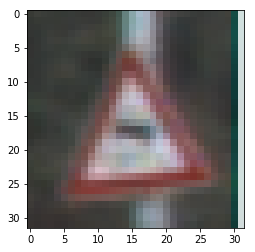

transformed image


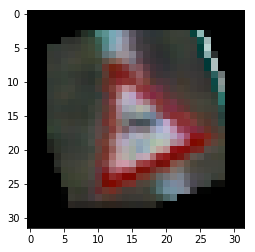

2
original image


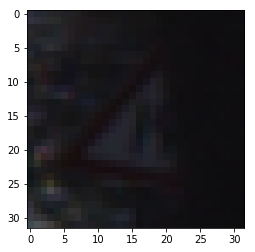

transformed image


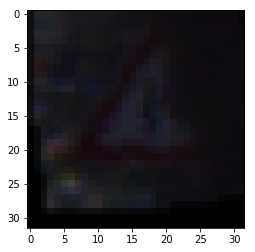

In [11]:
def preprocess(images, label):
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))
    #Image rotation
    radians_arr = np.random.uniform(-0.4,0.4, label.shape[0])
    radian = tf.placeholder(tf.float32, shape = 1)
    rot_images = tf.contrib.image.rotate(X, radian)
    #Image translation
    distances = np.random.uniform(-5,5, (label.shape[0],2))
    transform = tf.placeholder(tf.float32, shape = (8))
    tr_images = tf.contrib.image.transform(rot_images, transform, 'NEAREST')
    #Image scale
    scales = np.random.uniform(0.8,1.2, label.shape[0])
    boxes = tf.placeholder(np.float32, shape = (1,4))
    box_ind = np.zeros(1, dtype = np.int32)
    crop_size = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    scaled_images = tf.image.crop_and_resize(tr_images, boxes, box_ind, crop_size)
    #Brightness and saturation
    brightness = tf.image.random_brightness(scaled_images, max_delta=32.0/255.0)
    saturation = tf.image.random_saturation(brightness, lower=0.8, upper=2.2)
    new_images = []
    #new_images.extend(images)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        i = 0
        for img in images:
            x1 = y1 = 0.5 - 0.5 * scales[i] # To scale centrally
            x2 = y2 = 0.5 + 0.5 * scales[i]
            new_image = sess.run(saturation, feed_dict = {X: np.array([img]), 
                                                        radian: np.array([radians_arr[i]]),
                                                        transform:np.array([1,0,distances[i][0],0,1,distances[i][1],0,0]),
                                                        boxes: np.array([[y1, x1, y2, x2]])})
            i += 1
            #new_images.extend(img)
            new_images.extend(new_image)
        new_images = np.array(new_images, dtype = np.float32)
        new_images[(new_images < 0)] = 0
        new_images[(new_images >255)] = 255
    return new_images
test_images = X_valid[indices[22:25]]
test_labels = y_valid[indices[22:25]]
augmented_images = preprocess(np.array(test_images), np.array(test_images))
print(augmented_images.shape)
i=0
for img in augmented_images:
    print(i)
    print("original image")
    plt.imshow(np.array(test_images[i],dtype = np.int32))
    plt.show()
    print("transformed image")
    plt.imshow(np.array(img,dtype = np.int32))
    plt.show()
    i+=1

In [12]:
#Count how many images should be created throough data augmentation to balance data set
counted_train = Counter(y_train)
data_per_class = 500
classes = counted_train.keys()
missing_dic = counted_train.copy()
missing = np.zeros((len(classes),2), dtype = np.int32)
i = 0
qty_augmentation = 0
for key in counted_train.keys():
    missing[i][0] = key
    if(data_per_class - counted_train[key] > 0):
        missing[i][1] = ceil((data_per_class - counted_train[key]) / counted_train[key])
        missing_dic[key] = missing[i][1]
        qty_augmentation = qty_augmentation + (data_per_class - counted_train[key])
    else:
        missing_dic[key] = 0
    i += 1

#print(np.transpose(missing))
#print(missing_dic)
#print(qty_augmentation)


## AUGMENT AND SAVE DATA
Using Tensorflow

In [13]:
aug_factor = 1
qty_augmentation = aug_factor*X_train.shape[0]
def preprocess(images, label):
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))
    #Image rotation
    radians_arr = np.random.uniform(-0.10,0.10, qty_augmentation)
    radian = tf.placeholder(tf.float32, shape = 1)
    rot_images = tf.contrib.image.rotate(X, radian)
    #Image translation
    distances = np.random.uniform(-2,2, (qty_augmentation,2))
    transform = tf.placeholder(tf.float32, shape = (8))
    tr_images = tf.contrib.image.transform(rot_images, transform, 'NEAREST')
    #Image scale
    scales = np.random.uniform(0.92,1.08, qty_augmentation)
    boxes = tf.placeholder(np.float32, shape = (1,4))
    box_ind = np.zeros(1, dtype = np.int32)
    crop_size = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    scaled_images = tf.image.crop_and_resize(tr_images, boxes, box_ind, crop_size)
    #Brightness and saturation
    #brightness = tf.image.random_brightness(scaled_images, max_delta=32.0/255.0)
    saturation = tf.image.random_saturation(scaled_images, lower=0.7, upper=1.3)
    new_images = []
    new_images.extend(images)
    new_labels = []
    new_labels.extend(label)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        i = 0 #counter to iterate current dataset
        k = 0 #counts the total size of the new dataset
        for img in images:
            for j in range(aug_factor):
                #num_images = missing_dic[label[i]]
                #actual_qty_class = counted_train[label[i]]
                #if(num_images > 0 and actual_qty_class < data_per_class):
                    #for j in range(num_images):
                        #if(counted_train[label[i]] < data_per_class): 
                x1 = y1 = 0.5 - 0.5 * scales[k] # To scale centrally
                x2 = y2 = 0.5 + 0.5 * scales[k]
                new_image = sess.run(saturation, feed_dict = {X: np.array([img]), 
                                                                        radian: np.array([radians_arr[k]]),
                                                                        transform:np.array([1,0,distances[k][0],0,1,distances[k][1],0,0]),
                                                                        boxes: np.array([[y1, x1, y2, x2]])})
                k += 1
                new_images.extend(new_image)
                new_labels.extend([label[i]])
                counted_train[label[i]] += 1 
            i += 1
        print("data augmented. Correcting...")
        new_images = np.array(new_images, dtype = np.float32)
        new_images[(new_images < 0)] = 0
        new_images[(new_images >255)] = 255
    return new_images, np.array(new_labels, dtype = np.int32)


X_train_augmented, y_train_augmented = preprocess(np.array(X_train), np.array(y_train))
print(X_train_augmented.shape)
print(y_train_augmented.shape)
dist_pickle = {}
dist_pickle["features"] = X_train_augmented
dist_pickle["labels"] = y_train_augmented
pickle.dump( dist_pickle, open( "traffic-signs-data/train_augmented2.p", "wb" ) )

#for img in augmented_images:
#    plt.imshow(np.array(img,dtype = np.int32))
#    plt.show()

data augmented. Correcting...
(69598, 32, 32, 3)
(69598,)


### Show augmented data histogram

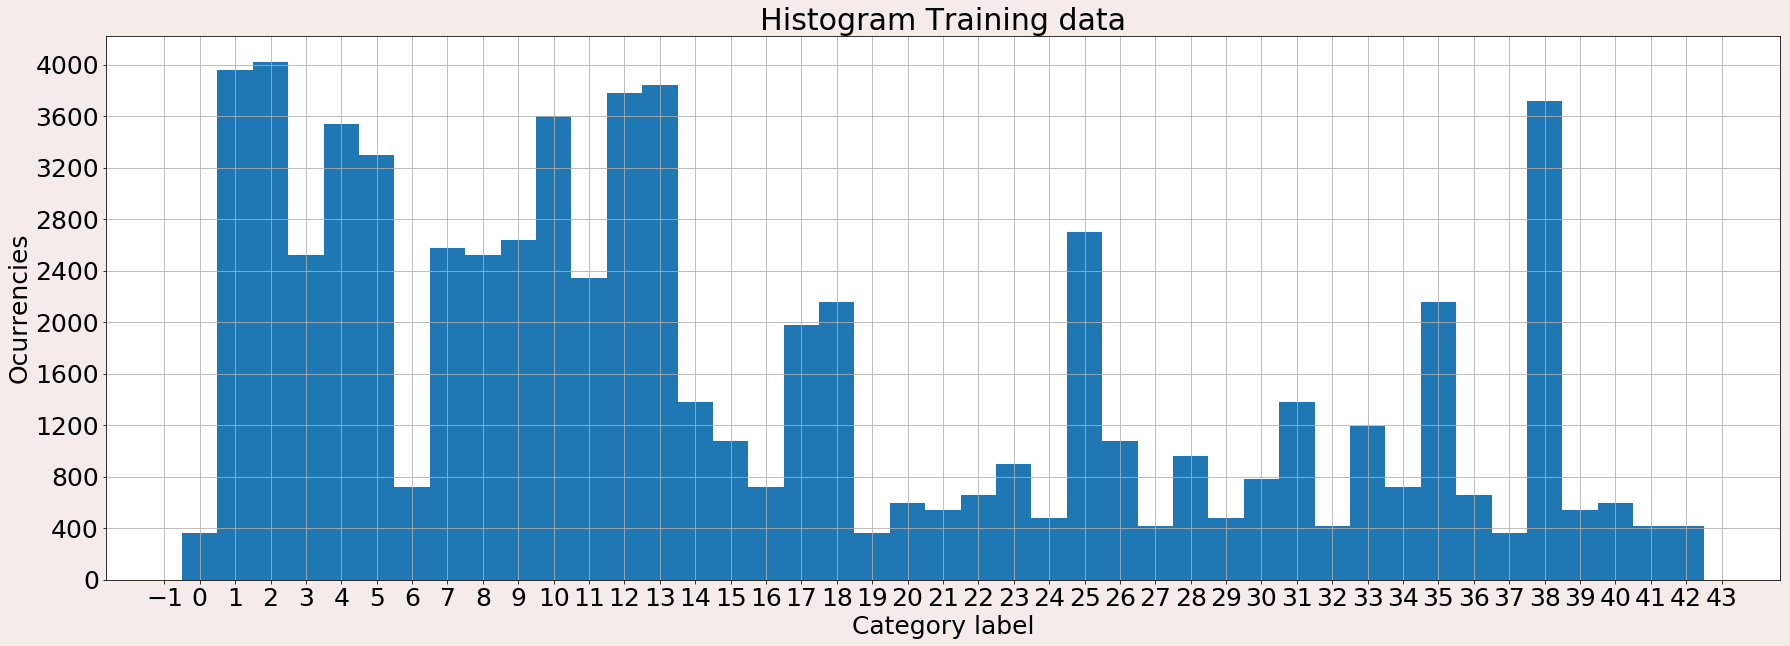

In [14]:
#=================================histogram of the augmented data===================================
d = np.diff(np.unique(y_train_augmented)).min()
left_of_first_bin = y_train_augmented.min() - float(d)/2
right_of_last_bin = y_train_augmented.max() + float(d)/2
fig, ax = plt.subplots(1,1,facecolor=(.96, .92, .91),figsize=(30,10))
ax.set_title('Histogram Training data', color='k', size = 30)
ax.set_xlabel('Category label', color='k', size = 25)
ax.set_ylabel('Ocurrencies', color='k', size = 25)
ax.tick_params(labelcolor='k', labelsize = 25)
ax.grid(True)
ax.xaxis.set_ticks(np.arange(-1.0,44.0,1.0))
ax.yaxis.set_ticks(np.arange(0.0,(aug_factor+1)*2100.0,400.0))
ax.hist(y_train_augmented, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()


### Load saved data (so it is not necessary to run data augmentation each time)

In [54]:
#========================= Load pickled data ==================
import pickle
import numpy as np
import tensorflow as tf

#  Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
training_file_augmented = 'traffic-signs-data/train_augmented2.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(training_file_augmented, mode='rb') as f:
    train_augmented = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_train_augmented, y_train_augmented = train_augmented['features'], train_augmented['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

import matplotlib.pyplot as plt
#===========================Data info ===================
import pandas
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

#  Number of training examples
n_train = X_train.shape[0]

#  Number of training augmented examples
n_train_augmented = X_train_augmented.shape[0]

#  Number of validation examples
n_validation = X_valid.shape[0]

#  Number of testing examples.
n_test = X_test.shape[0]

#  What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

#  How many unique classes/labels there are in the dataset.
n_classes = max(y_train)

print("Data info...")
print("Number of training examples =", n_train)
print("Number of training examples =", n_train_augmented)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Data info...
Number of training examples = 34799
Number of training examples = 69598
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 42


## Normalize data

In [55]:
# ========================== Normalize data ===========================
print("Normalizing data...")
X_train, y_train = train['features'], train['labels']  

#X_train_norm = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
#X_valid_norm = (X_valid - X_train.mean()) / (np.max(X_train) - np.min(X_train))
#X_test_norm = (X_test - X_train.mean()) / (np.max(X_train) - np.min(X_train))
#X_train_augmented_norm = (X_train_augmented - X_train_augmented.mean()) / (np.max(X_train_augmented) - np.min(X_train_augmented))

X_train_norm = (X_train - X_train.mean()) / (np.std(X_train))
X_valid_norm = (X_valid - X_train_augmented.mean()) / (np.std(X_train_augmented))
X_test_norm = (X_test - X_train_augmented.mean()) / (np.std(X_train_augmented))
X_train_augmented_norm = (X_train_augmented - X_train_augmented.mean()) / (np.std(X_train_augmented))
#X_valid_norm = (X_valid - X_train_augmented.mean()) / (np.max(X_train_augmented) - np.min(X_train_augmented))
#X_test_norm = (X_test - X_train_augmented.mean()) / (np.max(X_train_augmented) - np.min(X_train_augmented))

#X_train_augmented_norm =  2.0*(X_train_augmented - X_train_augmented.min())/(X_train_augmented.max()-X_train_augmented.min()) -1.0 
#X_valid_norm = 2.0*(X_valid - X_valid.min())/(X_valid.max()-X_valid.min()) -1.0
#X_test_norm = 2.0*(X_test - X_test.min())/(X_test.max()-X_test.min()) -1.0
#X_train_norm = 2.0*(X_train - X_train.min())/(X_train.max()-X_train.min()) -1.0

#X_train_augmented_norm = (X_train_augmented - X_train_augmented.min())/(X_train_augmented.max()-X_train_augmented.min())
#X_valid_norm = (X_valid - X_valid.min())/(X_valid.max()-X_valid.min())
#X_test_norm = (X_test - X_test.min())/(X_test.max()-X_test.min())
#X_train_norm = (X_train - X_train.min())/(X_train.max()-X_train.min())


Normalizing data...


### Shuffle Data

In [56]:
#=============================Shuffle data============================
from sklearn.utils import shuffle
print("Shuffling data...")
X_train_augmented_norm, y_train_augmented = shuffle(X_train_augmented_norm, y_train_augmented)
X_train_norm, y_train= shuffle(X_train_norm, y_train)

Shuffling data...


In [57]:
#Features and labels
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name = 'Input')
y = tf.placeholder(tf.int32, (None), name = 'Output')
one_hot_y = tf.one_hot(y, 43)

### Model Architecture

In [58]:
#===============Define Model Architecture========
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1
keep_prob = tf.placeholder(tf.float32, name = 'droput_keep_probability')
conv1_W = tf.Variable(tf.truncated_normal(name = 'weights_conv1', shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv2_W = tf.Variable(tf.truncated_normal(name = 'weights_conv2', shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
fc1_W = tf.Variable(tf.truncated_normal(name = 'weights_fc1', shape=(5*5*16, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc2_W  = tf.Variable(tf.truncated_normal(name = 'weights_fc2', shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))
fc3_W  = tf.Variable(tf.truncated_normal(name = 'weights_fc3', shape=(84, 43), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(43))
#LeNet
# conv 1
with tf.name_scope('conv1') as scope:   
    conv1  = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name = 'conv1')
    conv1 = tf.nn.bias_add(conv1, conv1_b, name = 'bias_conv1')
    conv1_act = tf.nn.relu(conv1)
    conv1_drop = tf.nn.dropout(conv1_act, keep_prob, name = 'dropout1')
conv1_mp = tf.nn.max_pool(conv1_drop, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
# conv2
with tf.name_scope('conv2') as scope:   
    conv2   = tf.nn.conv2d(conv1_mp, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name = 'conv2')
    conv2 = tf.nn.bias_add(conv2, conv2_b, name = 'bias_conv2')
    conv2_ac = tf.nn.relu(conv2)
    conv2_drop = tf.nn.dropout(conv2_ac, keep_prob, name = 'dropout2')
conv2_mp = tf.nn.max_pool(conv2_drop, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
# flatten
fc0   = flatten(conv2_mp)
# fully connected 1
with tf.name_scope('fully_connected1') as scope:   
    fc1  = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob, name = 'dropout3')

# fully connected 2
with tf.name_scope('fully_connected2') as scope: 
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob, name = 'dropout4')

# output
with tf.name_scope('output_layer') as scope: 
    logits = tf.matmul(fc2, fc3_W) + fc3_b

### Define weighted loss: such that it takes into account how unbalanced the data is (classes with less data have a larger weight)

In [59]:
#weights for loss
import math
from collections import Counter
counted_train = Counter(y_train_augmented)
#print(counted_train)
weights_arr = []
for i in range(0,43,1):
    #weights_arr.append( 1.0 - (counted_train[int(i)]/4020)*0.8)
    weights_arr.append(math.log(X_train_augmented.shape[0]/max(counted_train[i],1))+1)
weights_arr = np.array(weights_arr, dtype=np.float32) / max(weights_arr)
weights_loss = tf.constant(weights_arr)
print(weights_arr)

[1.         0.6172179  0.6148174  0.68936944 0.63511544 0.6463223
 0.8893511  0.6856132  0.68936944 0.6819433  0.6324325  0.7011995
 0.624644   0.62213004 0.78549623 0.82462573 0.8893511  0.7278667
 0.71397686 1.         0.9184556  0.9352746  0.903241   0.8537302
 0.9540766  0.67835593 0.82462573 0.9753925  0.8434277  0.9540766
 0.87657374 0.78549623 0.9753925  0.80807304 0.8893511  0.71397686
 0.903241   1.         0.62719816 0.9352746  0.9184556  0.9753925
 0.9753925 ]


### Define training algorithm and optimizer

In [60]:
rate = 0.02
regularization_factor = 0.001
#logits = LeNet(x)
with tf.name_scope('weight_logits') as scope: 
    weighted_logits = tf.multiply(logits,weights_loss)
with tf.name_scope('loss_calculation') as scope: 
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy) + regularization_factor*tf.nn.l2_loss(conv1_W) +regularization_factor*tf.nn.l2_loss(conv2_W) +regularization_factor*tf.nn.l2_loss(fc1_W) +regularization_factor*tf.nn.l2_loss(fc2_W) +regularization_factor*tf.nn.l2_loss(fc3_W) +regularization_factor*tf.nn.l2_loss(conv1_b) +regularization_factor*tf.nn.l2_loss(conv2_b) +regularization_factor*tf.nn.l2_loss(fc1_b) +regularization_factor*tf.nn.l2_loss(fc2_b) +regularization_factor*tf.nn.l2_loss(fc3_b)
with tf.name_scope('optimizer') as scope:
    optimizer = tf.train.RMSPropOptimizer(decay=0.95, epsilon=0.1, learning_rate=rate)  #try rmsprop
    training_operation = optimizer.minimize(loss_operation)

#================ evaluate =====================
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

### Create tf.summary objects to visualize data on tensorboard

In [61]:
loss_summary = tf.summary.scalar('Training_Loss', loss_operation)
accuracy_variable = tf.Variable(0.0)
accuracy_ph = tf.placeholder(tf.float32)
assign_op = accuracy_variable.assign(accuracy_ph)
accuracy_summary = tf.summary.scalar('Validation_Accuracy', accuracy_variable)

accuracy_train_variable = tf.Variable(0.0)
accuracy_train_ph = tf.placeholder(tf.float32)
assign_train_op = accuracy_train_variable.assign(accuracy_train_ph)
accuracy_train_summary = tf.summary.scalar('Train_Accuracy', accuracy_train_variable)

### evaluate accuracy

In [62]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={keep_prob:1.0, x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))     
    return total_accuracy / num_examples

### Train, Validate and Test the Model

In [93]:
EPOCHS = 70
BATCH_SIZE = 128
merged = tf.summary.merge_all()
with tf.Session() as sess:
    writer = tf.summary.FileWriter('/tmp/nd', sess.graph)
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_augmented_norm, y_train_augmented = shuffle(X_train_augmented_norm, y_train_augmented)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_augmented_norm[offset:end], y_train_augmented[offset:end]
            sess.run(training_operation, feed_dict={keep_prob:0.75, x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        train_accuracy = evaluate(X_train_augmented_norm, y_train_augmented)
        #summary 
        set_acc = sess.run(assign_op, feed_dict={accuracy_ph:validation_accuracy})
        set_acc_train = sess.run(assign_train_op, feed_dict={accuracy_train_ph:train_accuracy})
        summary = sess.run(merged, feed_dict={accuracy_train_ph:train_accuracy, accuracy_ph:validation_accuracy, keep_prob:0.75, x: batch_x, y: batch_y})   
        writer.add_summary(summary, i)  
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.416

EPOCH 2 ...
Validation Accuracy = 0.633

EPOCH 3 ...
Validation Accuracy = 0.732

EPOCH 4 ...
Validation Accuracy = 0.804

EPOCH 5 ...
Validation Accuracy = 0.849

EPOCH 6 ...
Validation Accuracy = 0.867

EPOCH 7 ...
Validation Accuracy = 0.895

EPOCH 8 ...
Validation Accuracy = 0.889

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 10 ...
Validation Accuracy = 0.930

EPOCH 11 ...
Validation Accuracy = 0.934

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.940

EPOCH 14 ...
Validation Accuracy = 0.943

EPOCH 15 ...
Validation Accuracy = 0.940

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.945

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.949

EPOCH 20 ...
Validation Accuracy = 0.949

EPOCH 21 ...
Validation Accuracy = 0.959

EPOCH 22 ...
Validation Accuracy = 0.956

EPOCH 23 ...
Validation Accuracy = 0.949

EPOCH 24 ...
Validation Accura

### Evaluate model on test data

In [94]:
#Evaluate model on test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.950


---

## Step 3: Test a Model on New Images


### Load and Output the Images

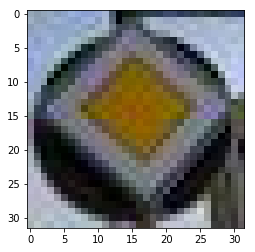

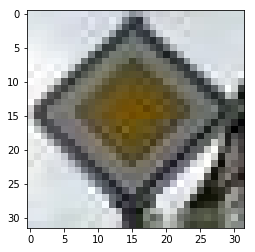

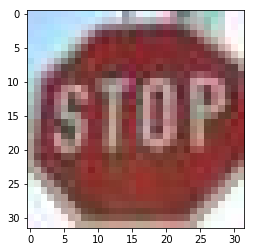

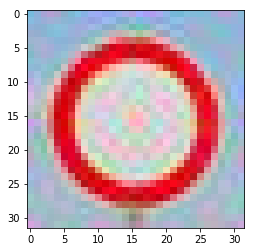

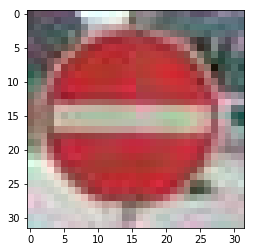

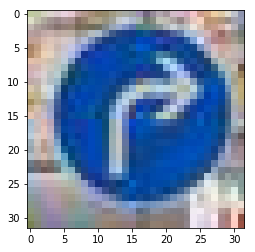

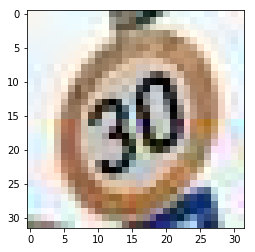

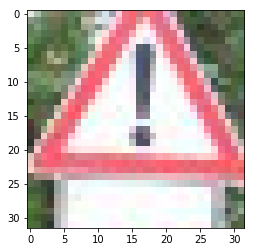

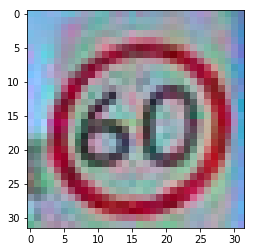

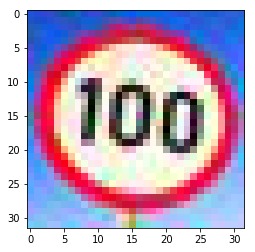

(10, 32, 32, 3)


In [99]:
import matplotlib.image as mpimg
import cv2
new_imgs_ind = [120,12,14,15,17,33,1,18,3,7]
#new_imgs_ind = [120,18,1,3,7]
test_imgs = []
for i in range(len(new_imgs_ind)):
    image = mpimg.imread('./test_images/test/' + str(new_imgs_ind[i])+'.jpeg')
    image = cv2.resize(image,(32,32))
    test_imgs.extend([image])
    plt.imshow(image)
    plt.show()
print(np.array(test_imgs).shape)
new_imgs_ind[0] = 12

# Load csv with class ids and sign names
import pandas as pd
file_sign_names = pd.read_csv("signnames.csv")
sign_names = file_sign_names.SignName



### Normalize test images

In [100]:
test_imgs_norm = (test_imgs - X_train_augmented.mean()) / (np.std(X_train_augmented))

### Predict classes from test images and analyze the accuracy

INFO:tensorflow:Restoring parameters from ./lenet
image  1


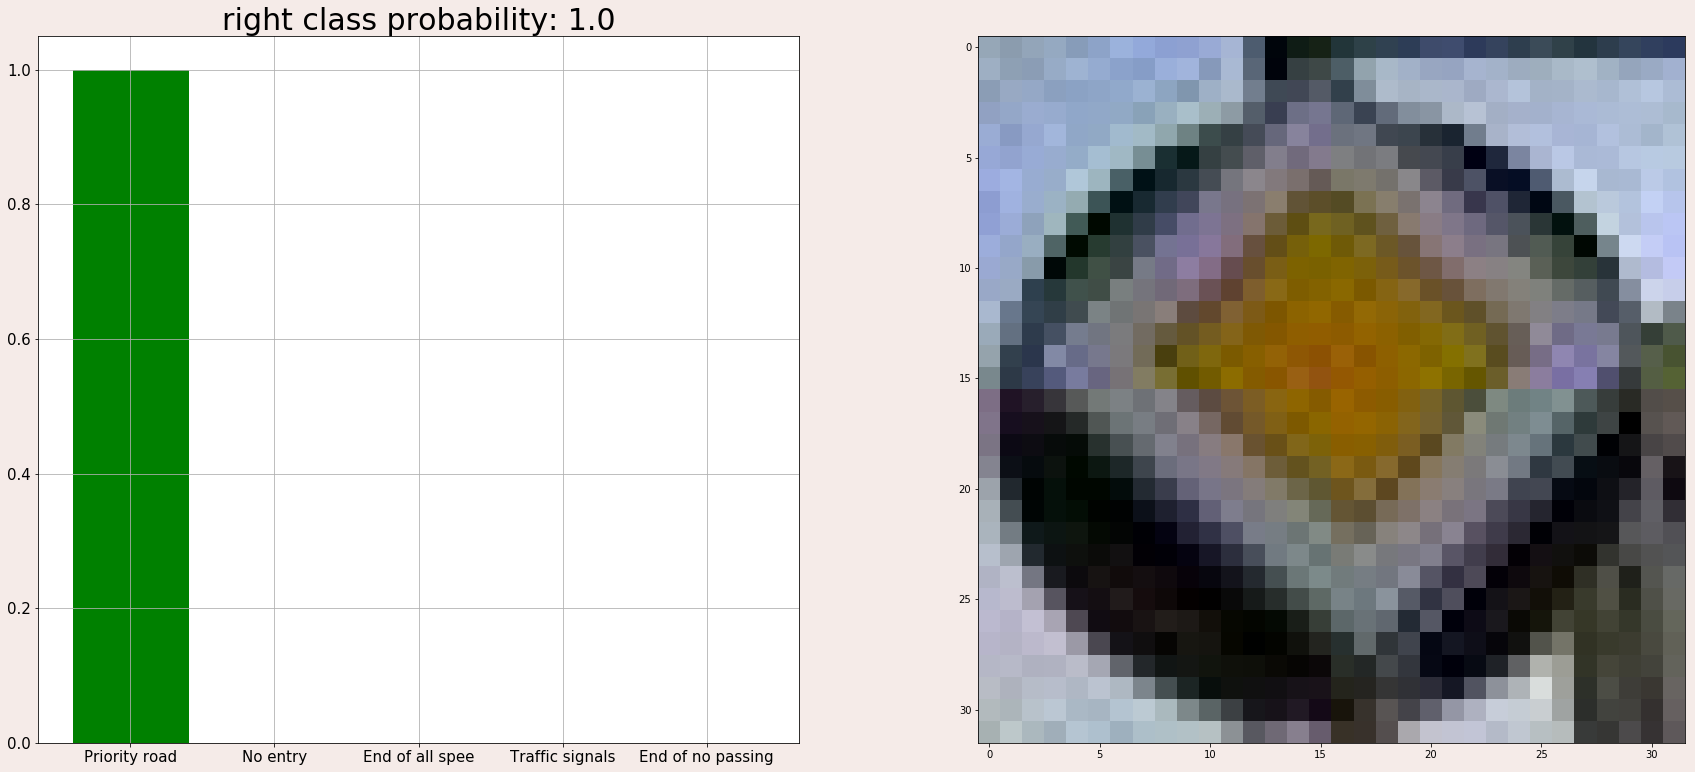

image  2


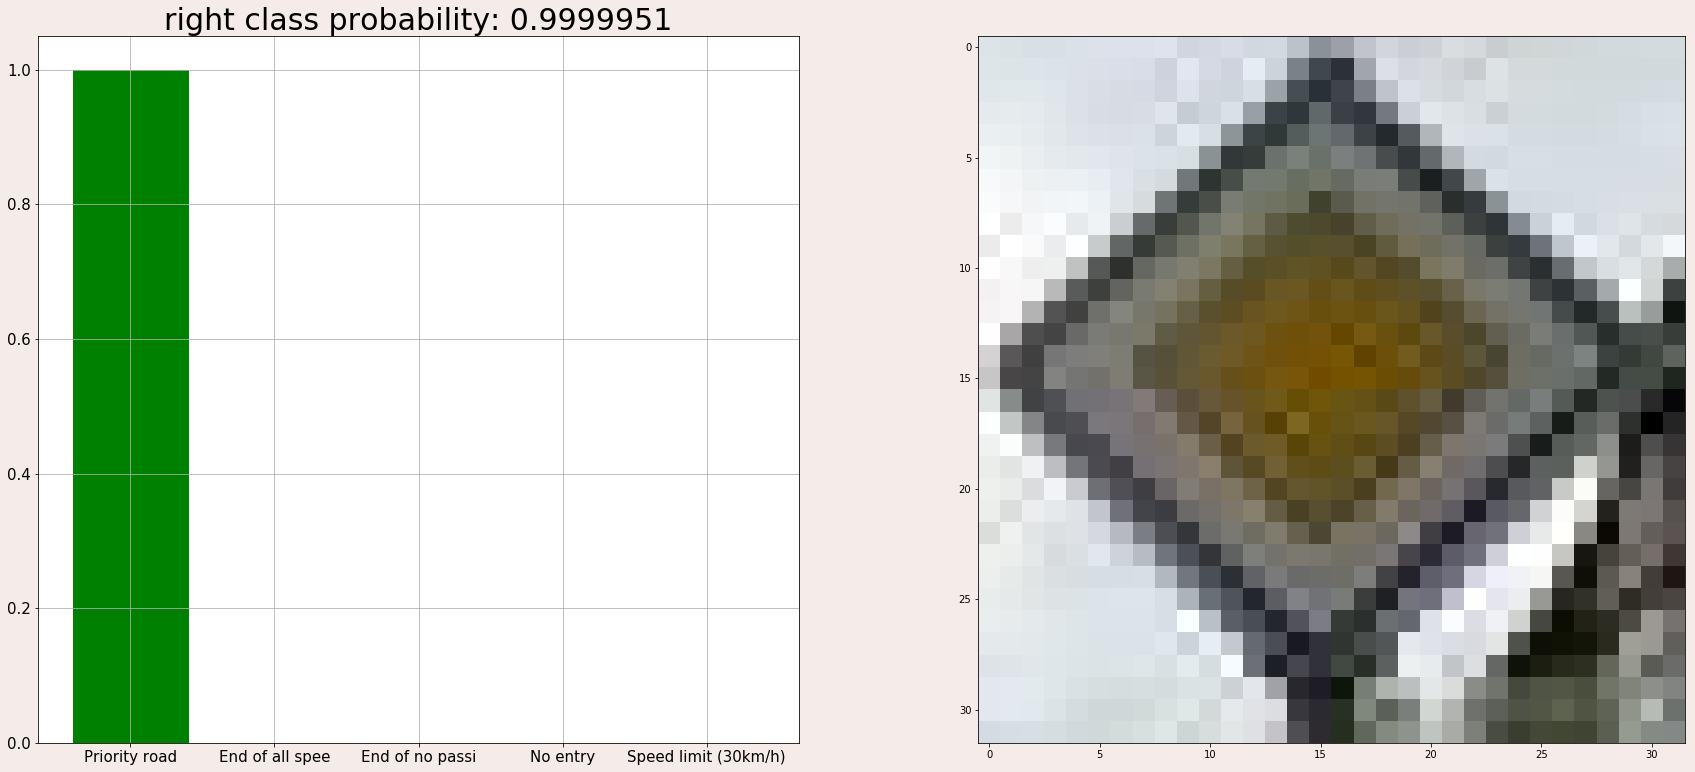

image  3


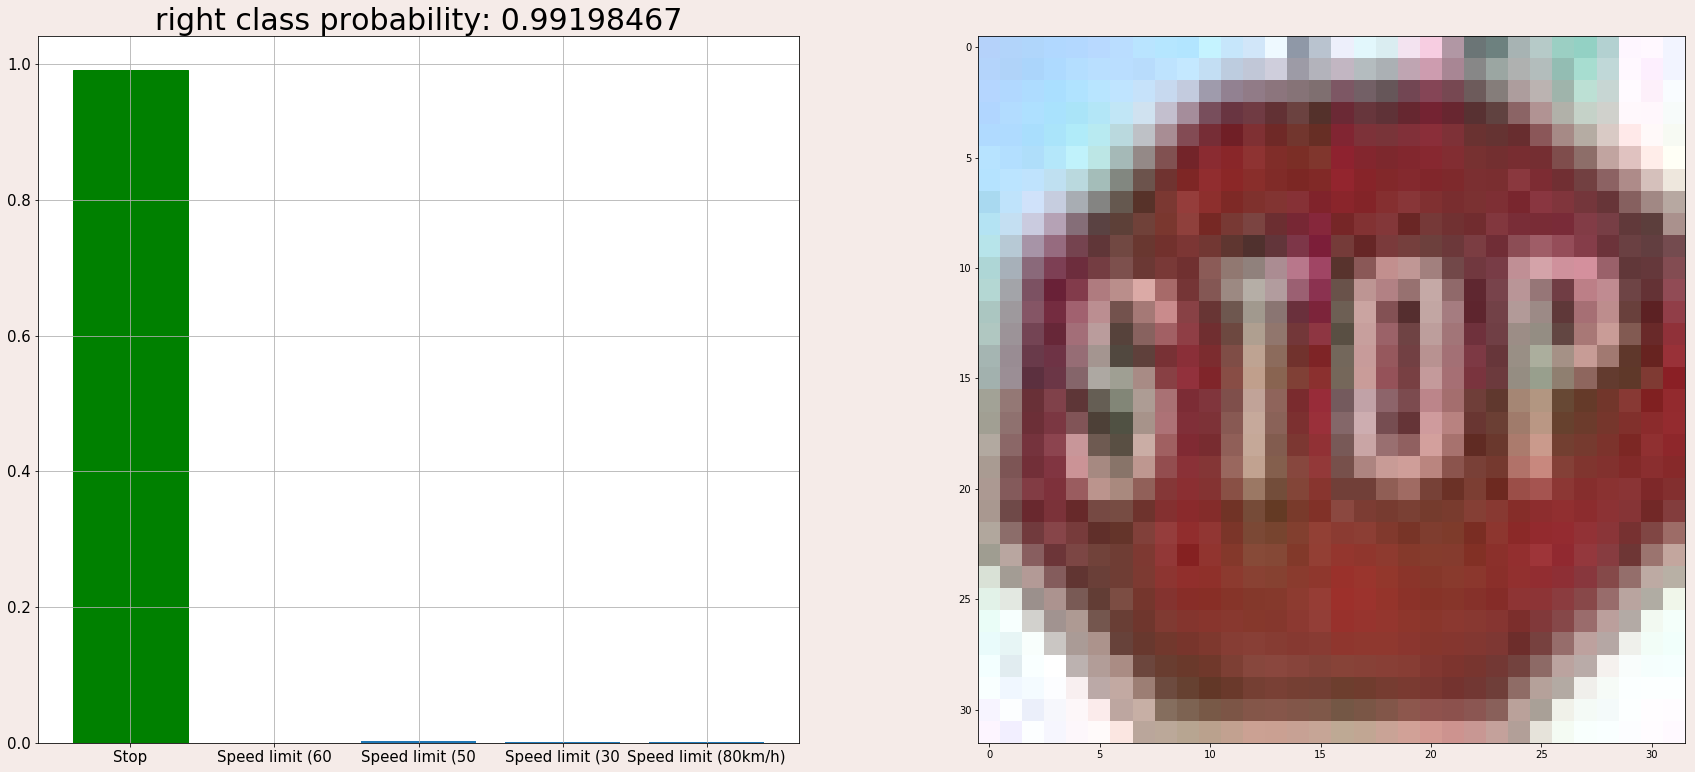

image  4


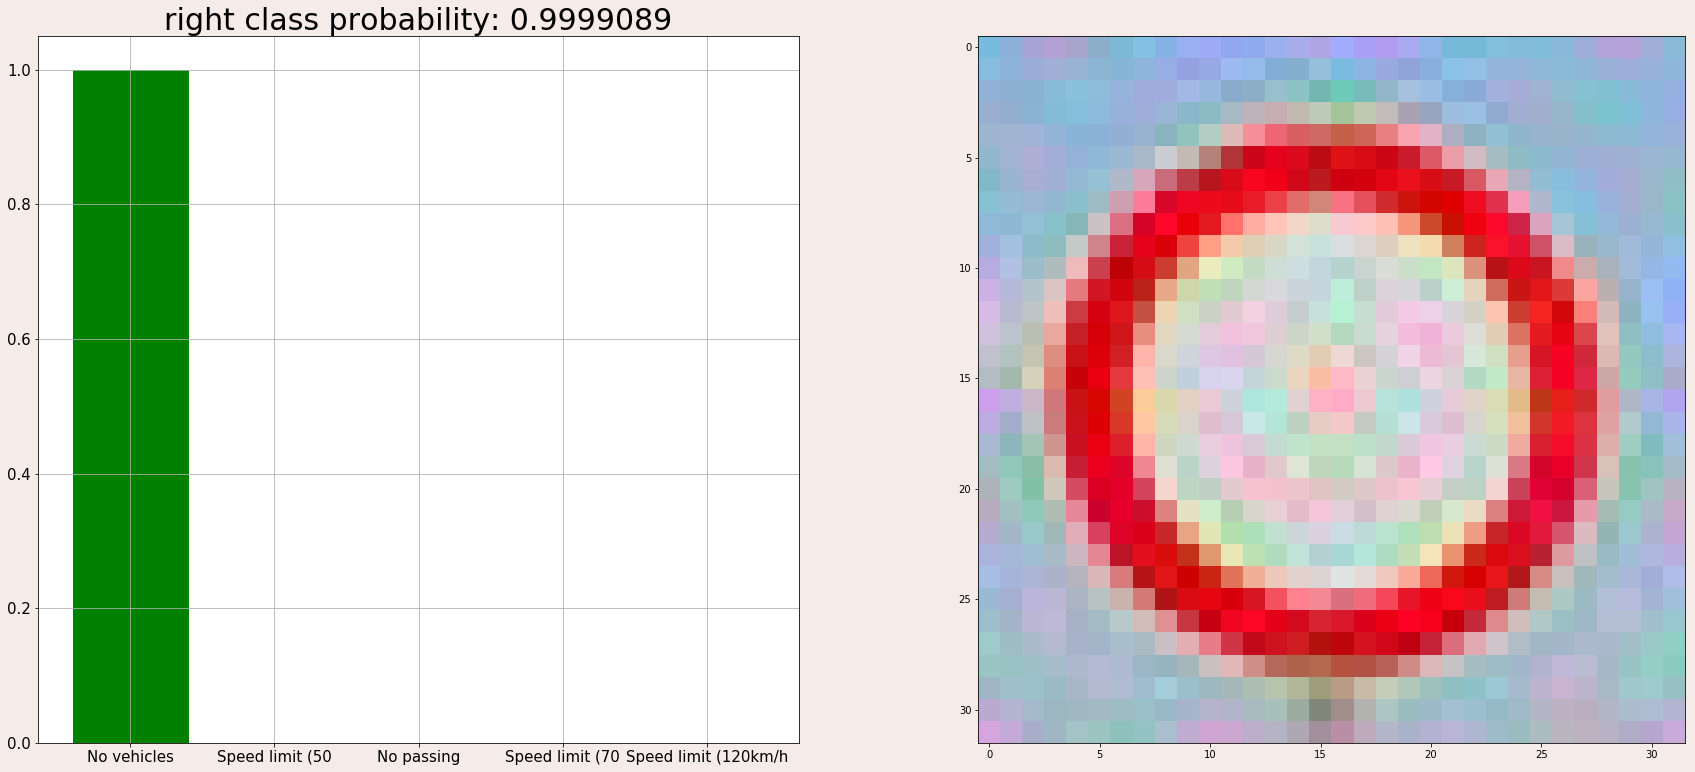

image  5


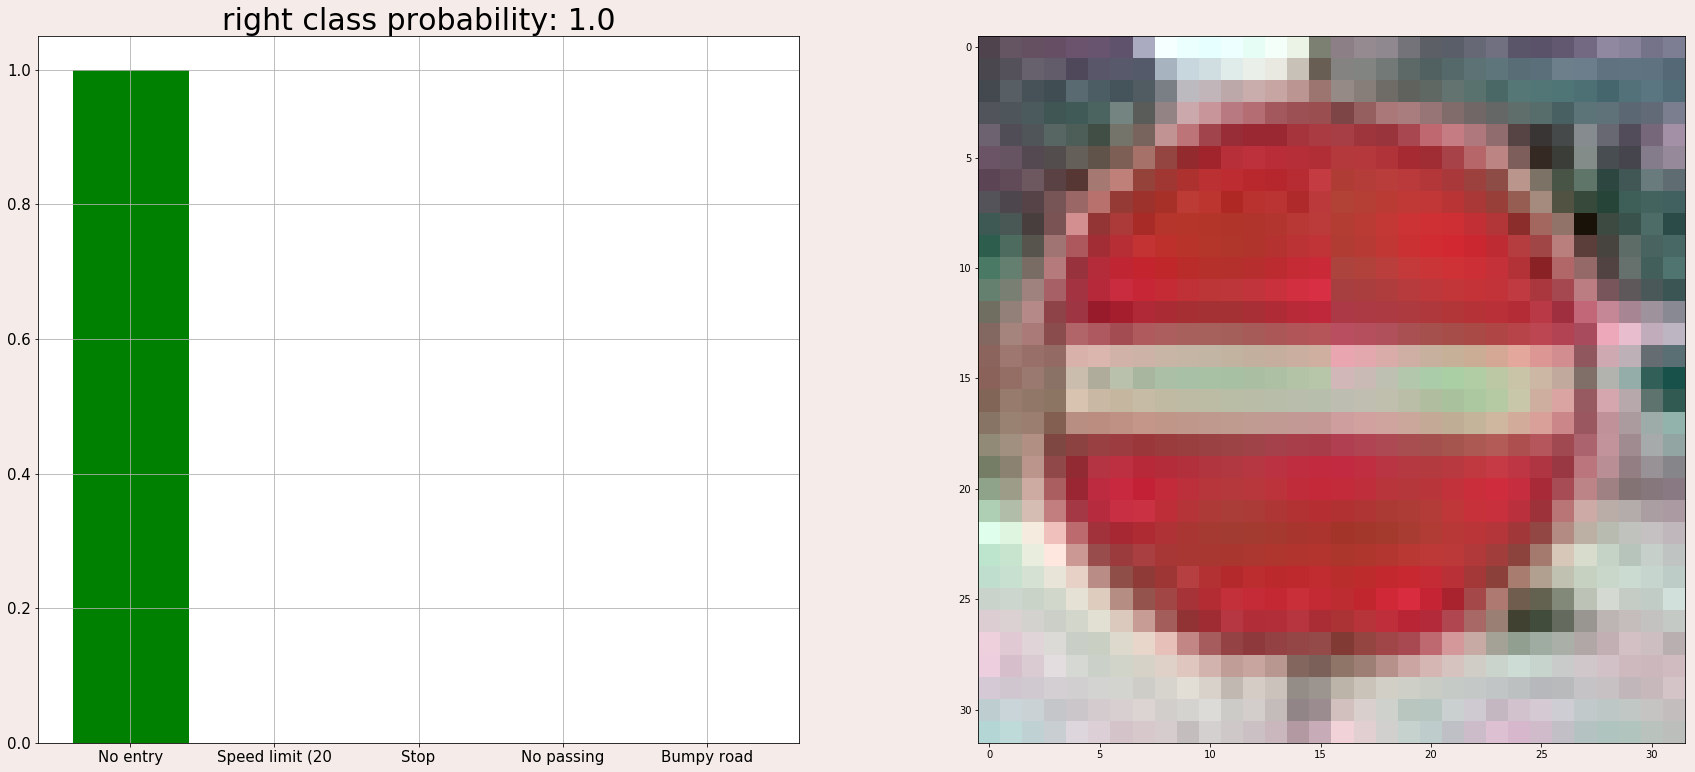

image  6


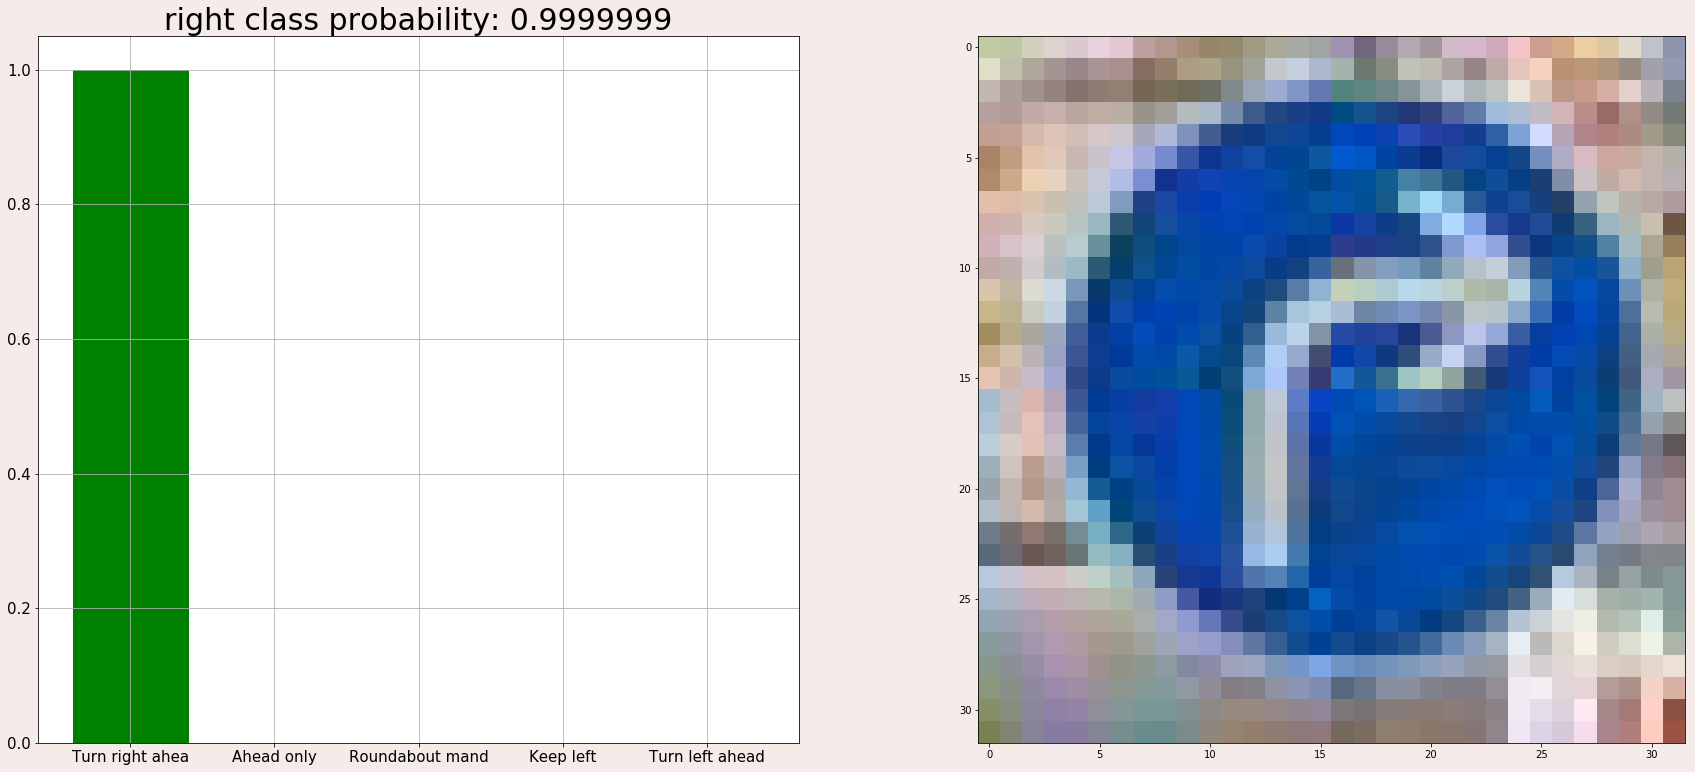

image  7


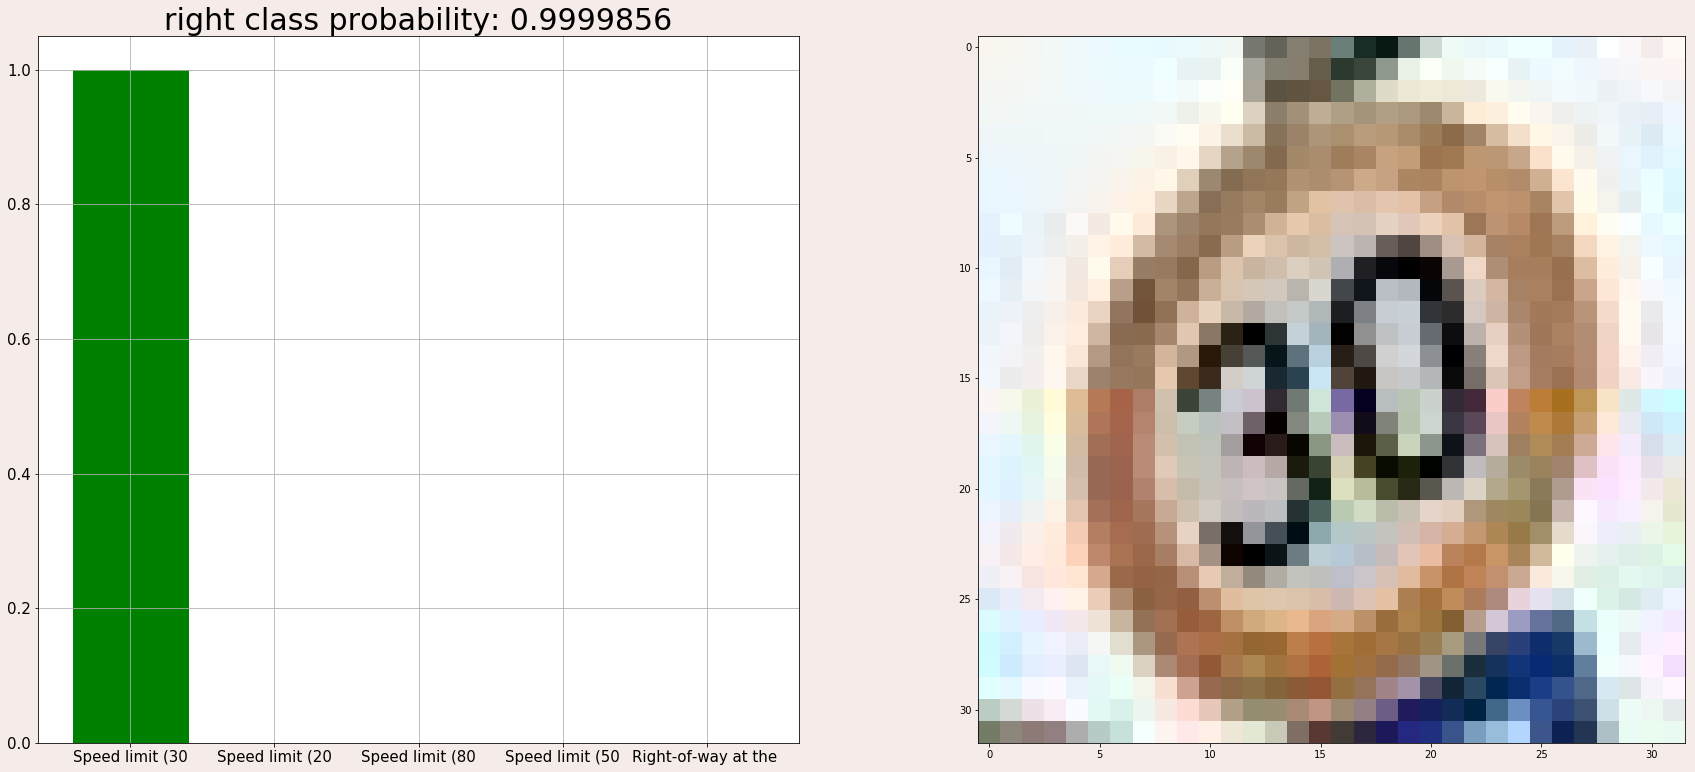

image  8


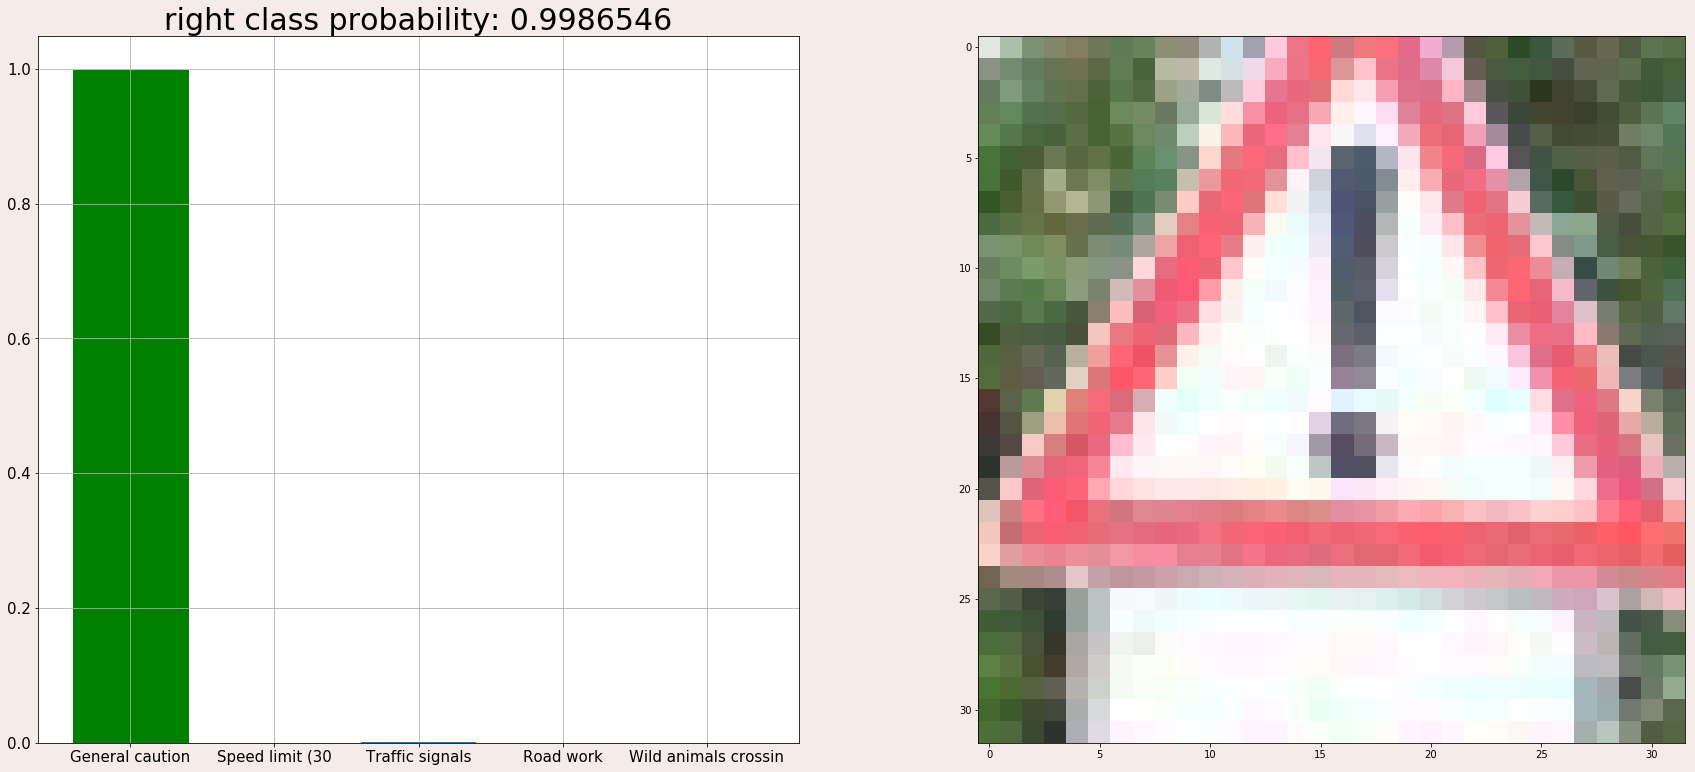

image  9


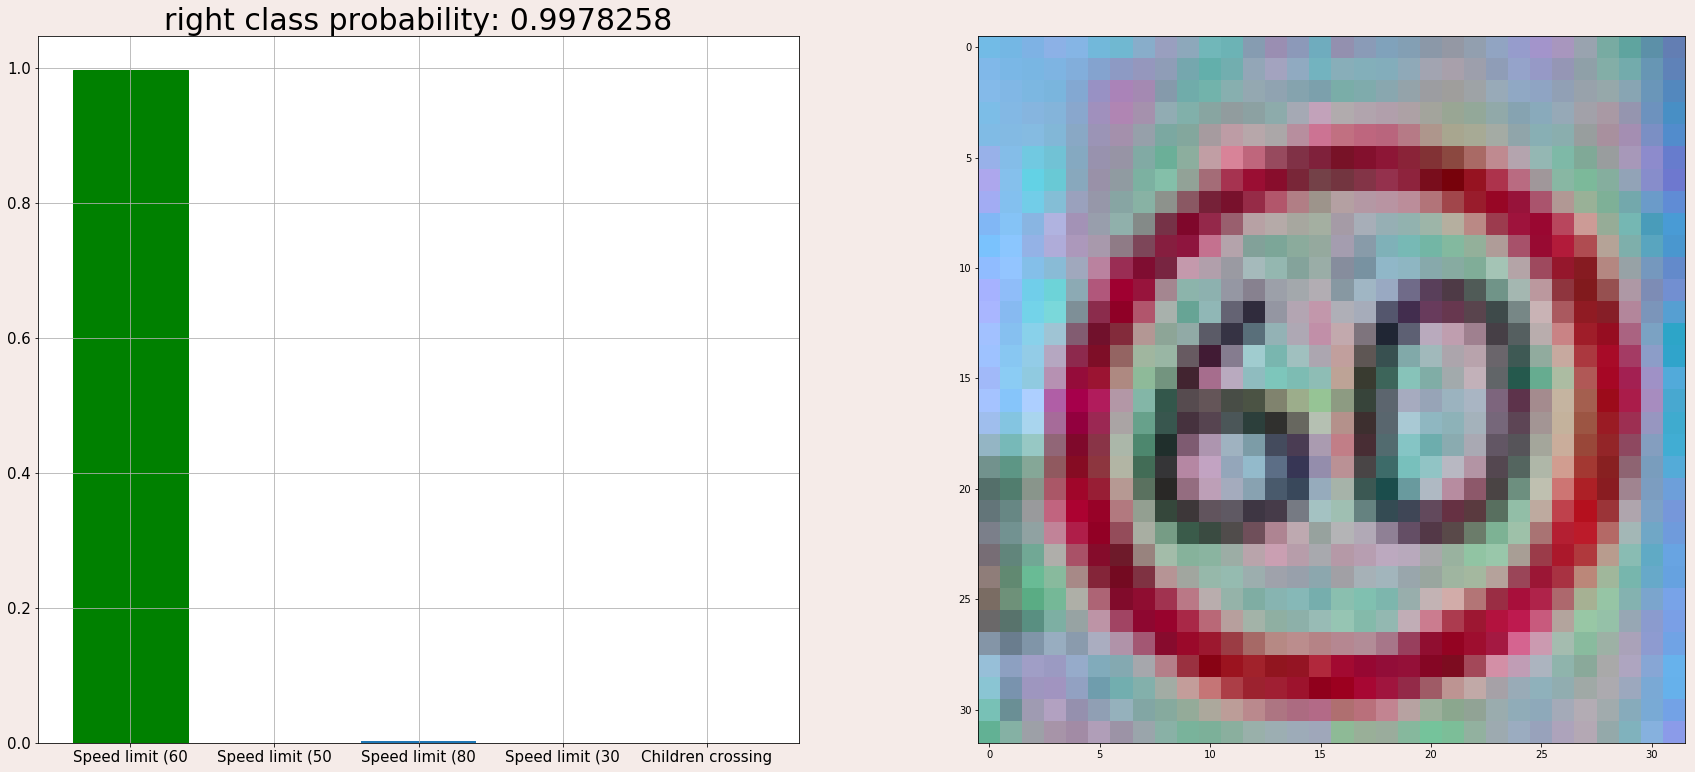

image  10


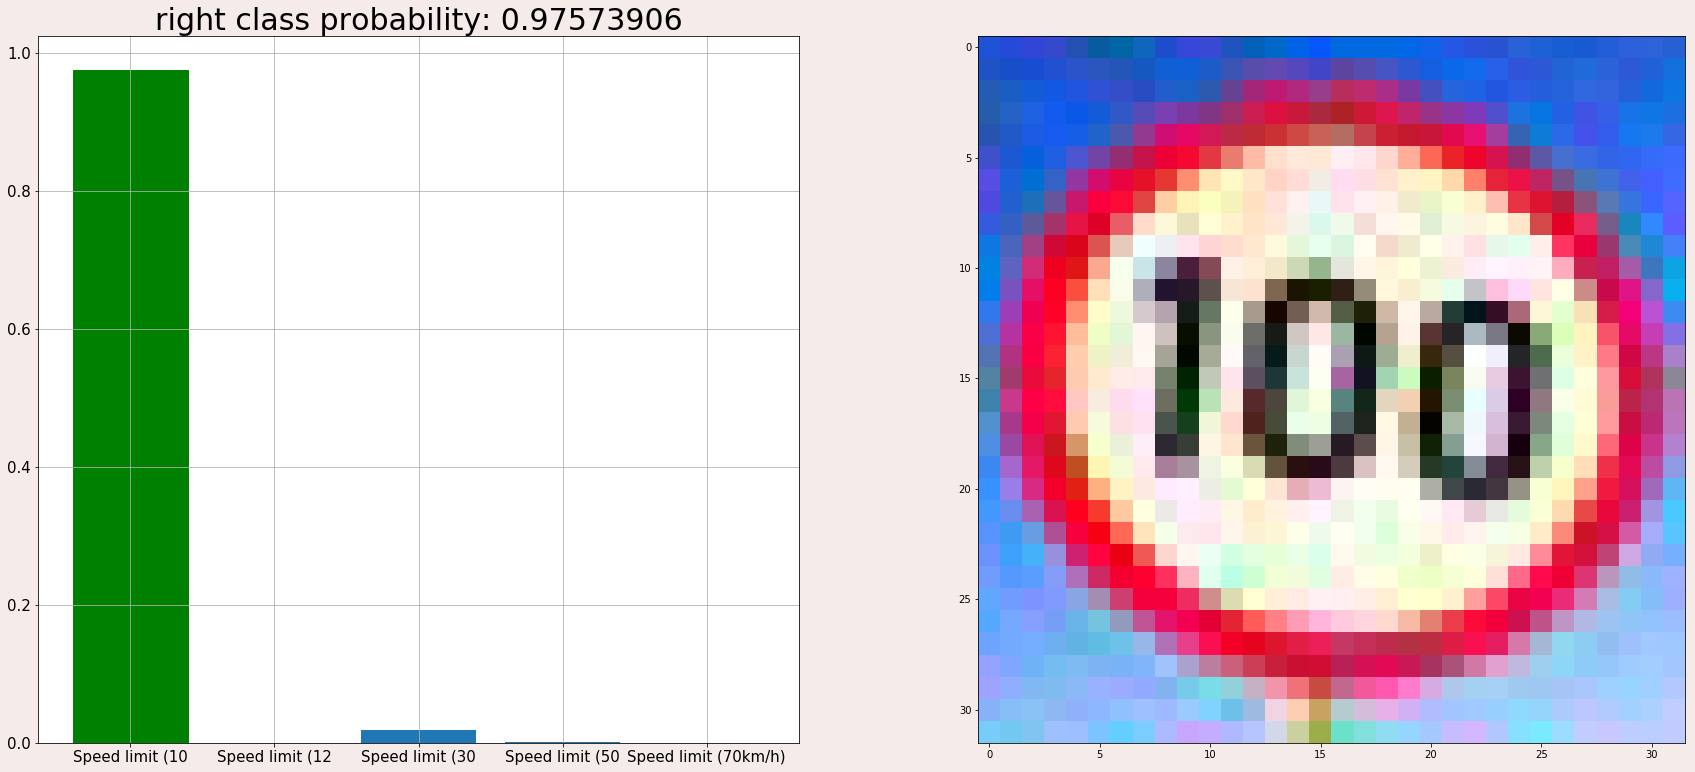



Prediction             Right class
---------------------  ---------------------
Priority road          Priority road
Priority road          Priority road
Stop                   Stop
No vehicles            No vehicles
No entry               No entry
Turn right ahead       Turn right ahead
Speed limit (30km/h)   Speed limit (30km/h)
General caution        General caution
Speed limit (60km/h)   Speed limit (60km/h)
Speed limit (100km/h)  Speed limit (100km/h)


model accuracy on test images:  1.0


In [102]:
from tabulate import tabulate
softmax = tf.nn.softmax(logits)
#Perform predictions
logits_test = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logits_test = sess.run(softmax, feed_dict={keep_prob:1.0, x: np.array(test_imgs_norm, dtype=np.float32)})
    top_logits_test = sess.run(tf.nn.top_k(tf.constant(logits_test), k=5))

#Show 5 top classes
#print(top_logits_test)
indexes = top_logits_test.indices
values = top_logits_test.values
j = 1
for i, value in zip(indexes, values):
    fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,13))
    print('image ', j)
    #Find the logit of the right class
    k = np.where(i == new_imgs_ind[j-1])
    x_ticks = [1.0,3.0,3.0,4.0,5.0]
    barlist = ax.bar(x_ticks, value)
    try:
        barlist[k[0][0]].set_color('g')
        ax.set_title('right class probability: '+str(value[k[0][0]]), color='k', size = 30)
    except:
        ax.set_title('right class outside top 5', color='k', size = 30)
    class_name = np.array(sign_names[i])
    ax.set_xticklabels(('0',class_name[0][0:15], class_name[1][0:15],class_name[2][0:15],class_name[3][0:15],class_name[4][0:20]))
    ax.tick_params(labelcolor='k', labelsize = 15)
    
    ax.grid(True)
    ax2.imshow(test_imgs[j-1])
    j += 1
    plt.show()   
    
predictions = []
right_count = 0
table = []
print('\n')
#Show predictions vs right class and calculate accuracy
for prediction, right_class in zip(logits_test, new_imgs_ind):
    predictions.extend([np.argmax(prediction)])
    table.extend([[ sign_names[np.argmax(prediction)], sign_names[right_class] ]])
    if(np.argmax(prediction) == right_class):
        right_count += 1
print(tabulate(table, headers=['Prediction', 'Right class']))
print('\n')
print('model accuracy on test images: ', right_count/len(new_imgs_ind))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


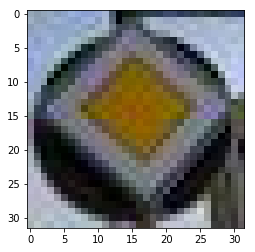

INFO:tensorflow:Restoring parameters from ./lenet


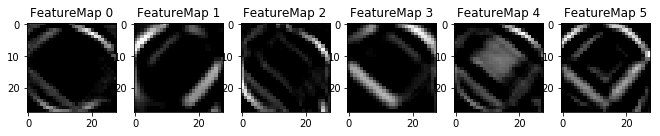

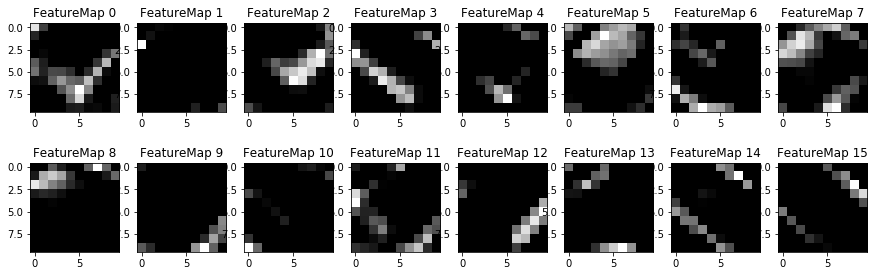

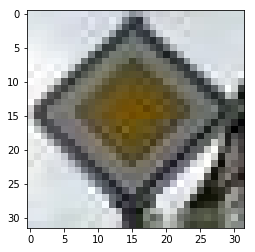

INFO:tensorflow:Restoring parameters from ./lenet


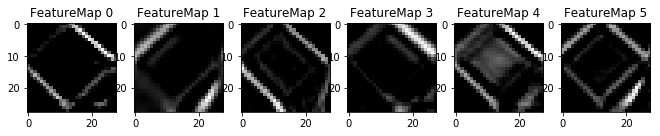

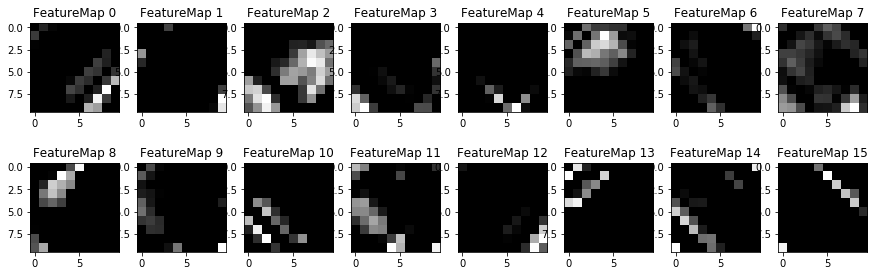

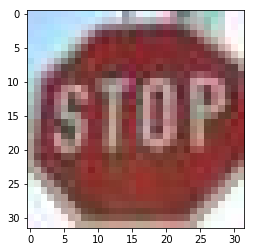

INFO:tensorflow:Restoring parameters from ./lenet


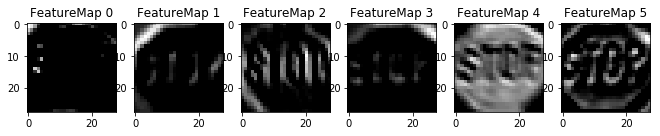

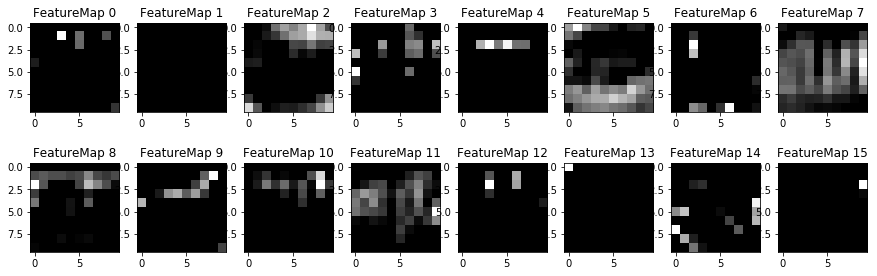

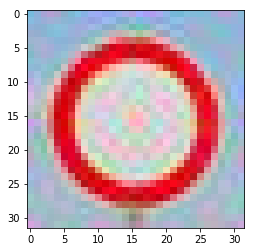

INFO:tensorflow:Restoring parameters from ./lenet


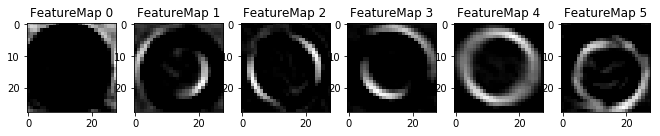

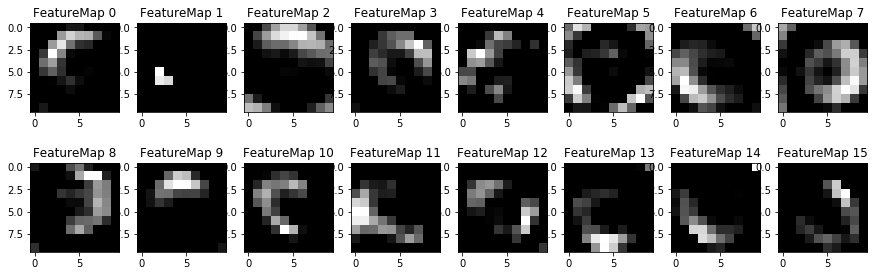

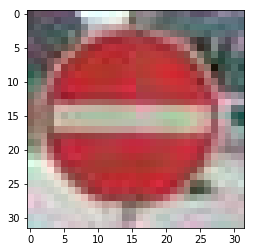

INFO:tensorflow:Restoring parameters from ./lenet


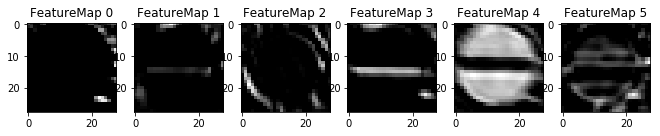

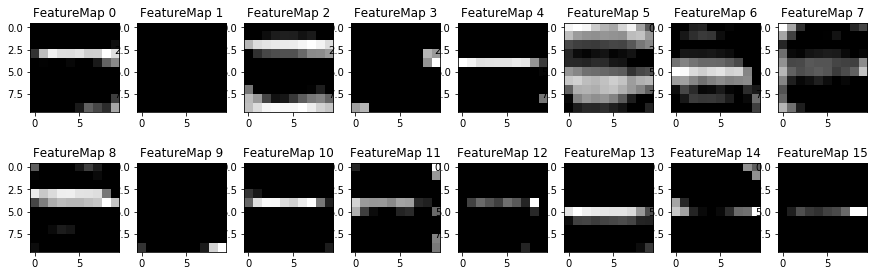

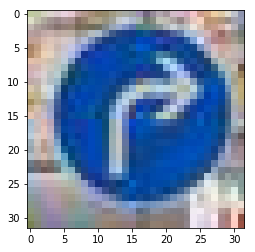

INFO:tensorflow:Restoring parameters from ./lenet


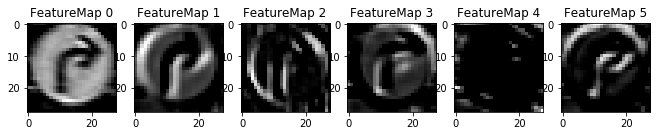

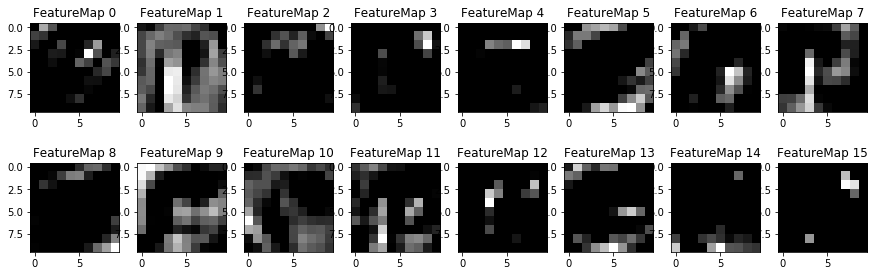

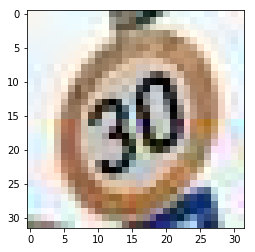

INFO:tensorflow:Restoring parameters from ./lenet


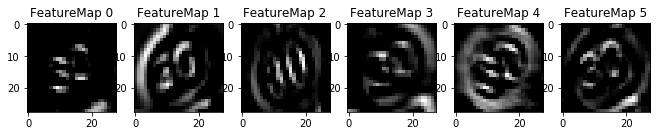

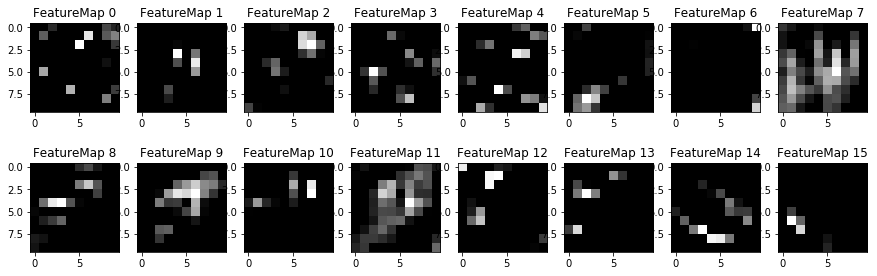

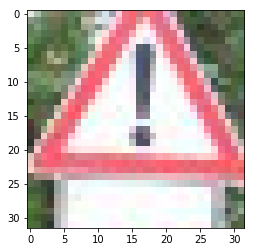

INFO:tensorflow:Restoring parameters from ./lenet


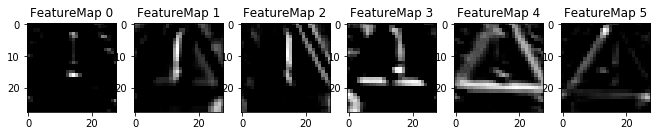

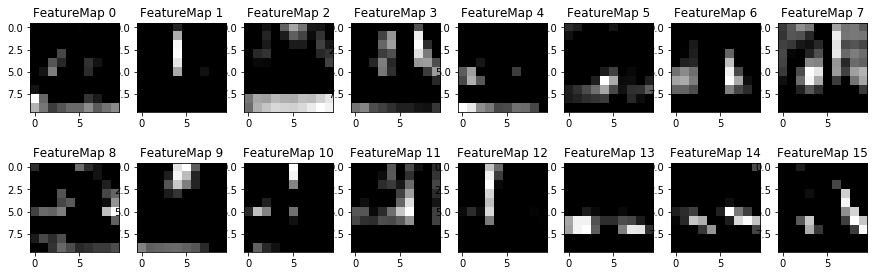

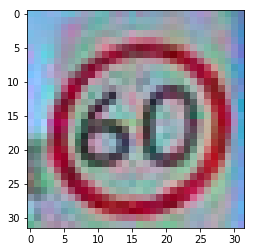

INFO:tensorflow:Restoring parameters from ./lenet


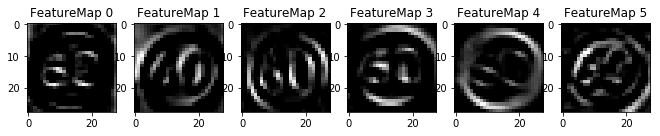

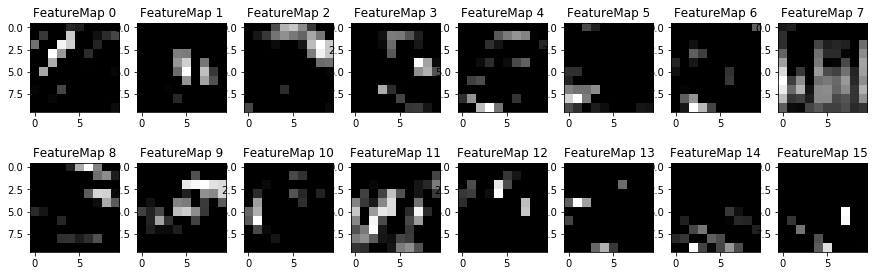

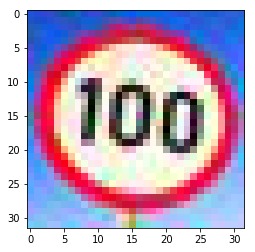

INFO:tensorflow:Restoring parameters from ./lenet


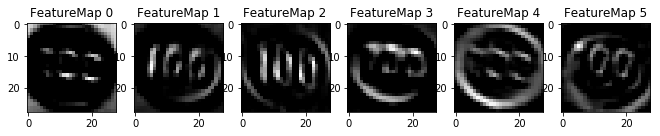

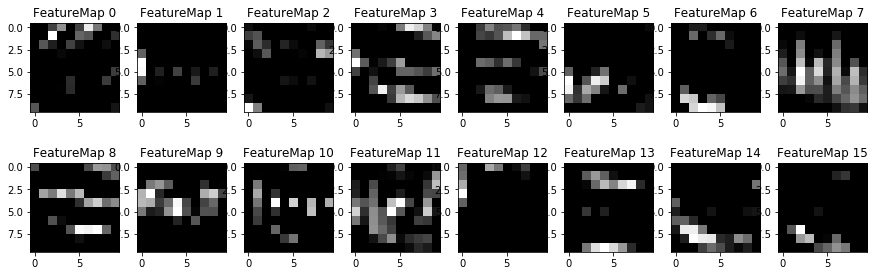

In [103]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob:1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

#Evaluate model on test data
for img in test_imgs:
    plt.imshow(img)
    plt.show()
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        outputFeatureMap([img], conv1_act)
        plt.show()
        outputFeatureMap([img], conv2_ac)
        plt.show()